$\newcommand{\d}{\mathrm{d}}$

# Ordinary differential equations

Finding the solutions to ordinary differential equations (ODEs) are one of the most common use cases for numerical techniques in physics.

## First-order differential equations

Let's begin with a discussion of first-order differential equations with a single independent variable.  The general form of such an equation (with independent variable time $t$ and dependent variable position $x$) is
\begin{equation}\tag{1}
    \frac{\d x}{\d t}=f(x,t),
\end{equation} where $f(x,t)$ is some specified function of $x$ and $t$.  To solve such an equation, we seek a function $x(t)$ (the solution) for which this equation holds.  The function $f(x,t)$ only specifies the slope of the solution.  We need an initial or boundary condition to fully determine the solution.

### Euler's method

Let's assume we are given a differential equation in the form of Equation 1 and suitable initial conditions; in this case, the position of the object at some inital time $t_0$, $x(t_0)$.  Then we can calculate the position of this object a short time interval $h$ later by considering the Taylor expansion of $x(t_0+h)$ about $x(t_0)$:
\begin{align}
    x(t_0+h) &= x(t_0) + h\left[\frac{\d x}{\d t}\right]_{t_0} + \frac{1}{2}h^2\left[\frac{\d^2x}{\d t^2}\right]_{t_0} + \cdots\\
             &= x(t_0) + hf(x(t_0),t_0) + \mathcal{O}(h^2)
\end{align}
Neglecting terms proportional to the second and higher powers of the small parameter $h$ yields the basic equation of Euler's method: \begin{equation}\tag{2}
    x(t_0+h) = x(t_0) + hf(x(t_0),t_0).
\end{equation}

Through repeated application of this equation, we can iteratively calculate the position of the object indefinitely into the future; we use the initial conditions at time $t_0$ to determine the slope of the solution at $t_0$ and extrapolate the solution to time $t_0+h$, from which we can calculate the slope of the solution at time $t_0+h$ and extrapolate the solution to time $t_0+2h$, ...

--------------------

Let's use Euler's method to solve the differential equation $\frac{\d x}{\d t}=-3t^2e^x$, subject to the inital condition $x(t_0)=10$ m.

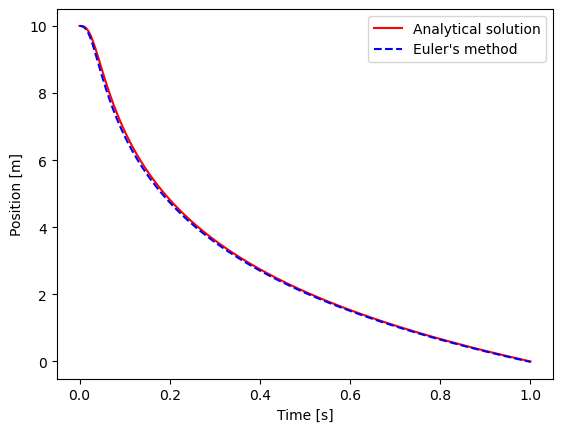

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

x0 = 10 #m
tf = 1 #s
N = 200 #number of steps to perform

def f(x,t):   
    return -3 * t**2 * math.exp(x)

####################################################################
def eulerMethod(f, x0, tf, N):
    
    tValues = np.linspace(0, tf, N)
    h = (tValues[-1] - tValues[0])/N

    xValues = [x0]  
    
    x = x0
    for t in tValues[1:]:   #we already know x(t[0]) = x0
        x = x + h*f(x,t)
        xValues.append(x)

    return tValues, xValues
####################################################################

tValues, euler = eulerMethod(f, x0, tf, N)

plt.figure()

plt.plot(tValues, -np.log(tValues**3 + math.exp(-x0)), "r" , label="Analytical solution")
plt.plot(tValues, euler, "b--" , label="Euler's method")

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")

plt.legend(loc='best')

For such a simple method, the results are surprisingly accurate.

-------------

Since Euler's method is based on a Taylor expansion that neglects terms of order $h^2$ (and higher orders), each step of the process introduces an error proportional to $h^2$.  Thus, in order to minimize the error, we should make $h$ as small as possible.  However, this leads to increased CPU consumption.  

Regardless of the size of $h$, since the method involves repeated application of Equation 2, the cumulative error grows with each iteration.  It turns out that the cumulative error is generally about an order of magnitude larger than the per-step error, so the error associated with Euler's method is typically first-order in $h$.  Fortunately, there are more accurate methods which are only slightly more complicated to program.

### Runge-Kutta method

There are a variety of Runge-Kutta (RK) methods which gives results of varying degrees of accuracy.  Euler's method is technically a first-order RK method (meaning it is accurate only to first order in $h$).  Let's investigate the second-order RK method.

Equation 1 tells us the slope of the solution for any values of $x$ and $t$.  Initial conditions are typically given, which specify the position $x(t_0)$.  Thus, we can calculate the slope of the solution $x(t)$ at $t=t_0$ as $f(x(t_0),t_0)$.

<center>
<div>
    <img src="../Images/fig8-2.png" width="500"/>
</div>
</center>

In the context of Euler's method, we use this value (along with Equation 2) to extrapolate the solution from time $t_0$ to $t_0+h$; in other words, to obtain $x(t_0+h)$.  With this estimate, we can then calculate the slope of the solution at time $t_0+h$, extrapolate the solution from time $t_0+h$ to $t_0+2h$, and repeat ad infinitum.

The second-order RK method is similar, except that we don't use the slope at time $t_0$ to extrapolate to $t_0+h$.  Instead, we use the slope at the midpoint of the interval, which occurs at time $t_0+h/2$, to perform the extrapolation.

To understand why this represents an improvement over Euler's method, let's perform a Taylor expansion of $x(t_0)$ and $x(t_0+h)$ around $t_0+h/2$:
\begin{align}
    x(t_0) &= x(t_0+h/2) - \frac{h}{2}\left[\frac{\d x}{\d t}\right]_{t_0+h/2} + \frac{h^2}{8}\left[\frac{\d^2 x}{\d t^2}\right]_{t_0+h/2} + \mathcal{O}(h^3) \\
    x(t_0+h) &= x(t_0+h/2) + \frac{h}{2}\left[\frac{\d x}{\d t}\right]_{t_0+h/2} + \frac{h^2}{8}\left[\frac{\d^2 x}{\d t^2}\right]_{t_0+h/2} + \mathcal{O}(h^3)
\end{align}
Subtracting the former equation from the latter yields
\begin{align}
    &x(t_0+h) - x(t_0) = h\left[\frac{\d x}{\d t}\right]_{t_0+h/2} + \mathcal{O}(h^3)\\
    &x(t_0+h) = x(t_0) + hf(x(t_0+h/2), t_0+h/2) + \mathcal{O}(h^3)\tag{4}.
\end{align}
Conventiently, terms in the expansion which are even in $h$ cancel.  Now, if we retain only the leading term in $h$, the error is $\mathcal{O}(h^3)$.  In other words, Equation 4, which is the basic equation representing the second-order RK method, is accurate to second-order in $h$ (whereas Equation 2 is only accurate to first-order).

The catch to this method is that we need to know $x(t_0+h/2)$.  We can estimate this value using Euler's method and the known value of $x(t_0)$ according to Equation 2 (with the replacement $h\rightarrow h/2$): $x(t_0+h/2) = x(t_0) + \frac{h}{2}f(x(t_0),t_0)$.  With this value, we can estimate the slope at $t_0+h/2$, and use this to extrapolate the solution from time $t_0$ to $t_0+h$.

To summarize, the steps to extrapolate from time $t_0$ to $t_0+h$ using the second-order RK method consist of:
 1. Estimate the solution at time $t_0+h/2$ using Euler's method: $x(t_0+h/2) = x(t_0) + \frac{h}{2}f(x(t_0),t_0)$
 1. Calculate the slope of the solution at time $t_0+h/2$: $m = f(x(t_0+h/2), t_0+h/2)$
 1. Use this slope to extrapolate the solution from time $t_0$ to $t_0+h$: $x(t_0+h) = x(t_0) + mh$
 
We then repeat this process to extrapolate from $t_0+h$ to $t_0+2h$, $t_0+2h$ to $t_0+3h$, ...

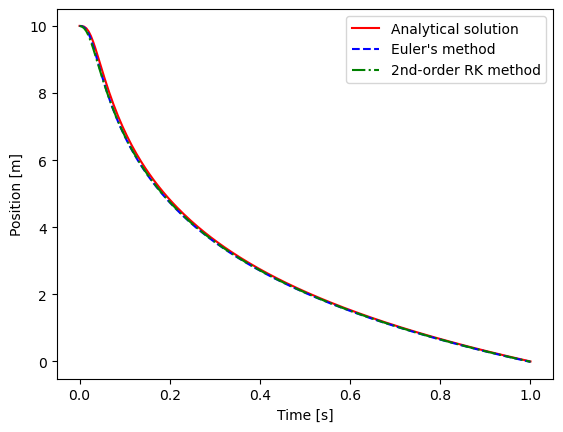

In [2]:
def rk2Method(f, x0, tf, N):

    tValues = np.linspace(0, tf, N)
    h = (tValues[-1] - tValues[0])/N

    xValues = [x0]  

    x = x0
    for t in tValues[1:]:   #we already know x(t[0]) = x0
        ##########################################################
        #This is where the method differes from Euler's method
        xm = x + (h/2)*f(x,t)
        slope = f(xm,t+(h/2))
        x = x + h*slope
        ##########################################################
        
        xValues.append(x)
        
    return tValues, xValues
####################################################################

tValues, euler = eulerMethod(f, x0, tf, N)
tValues, rk2 = rk2Method(f, x0, tf, N)

plt.figure()

plt.plot(tValues, -np.log(tValues**3 + math.exp(-x0)), "r" , label="Analytical solution")
plt.plot(tValues, euler, "b--" , label="Euler's method")
plt.plot(tValues, rk2,   "g-." , label="2nd-order RK method")

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")

plt.legend(loc='best')

-----------------

The fourth-order RK method is only slightly more complicated than the second-order RK method, but can be considerably more accurate.  Like the second-order RK method, it involves the calculation of Taylor expansions around various points, then taking an appropriate linear combination (causing certain terms to cancel, as above).  The basic equation that results is
\begin{equation}\tag{5}
    x(t_0+h) = x(t_0) + \frac{1}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right),
\end{equation}
where 
\begin{align}
    k_1&=hf(x(t_0), t_0)\\
    k_2&=hf(x(t_0)+\frac{1}{2}k_1, t_0+\frac{1}{2}h)\\
    k_3&=hf(x(t_0)+\frac{1}{2}k_2, t_0+\frac{1}{2}h)\\
    k_4&=hf(x(t_0)+k_3, t_0+h).
\end{align}
Equation 5 is accurate to fourth-order in $h$.  

Let's compare the results of this method with the previous methods.

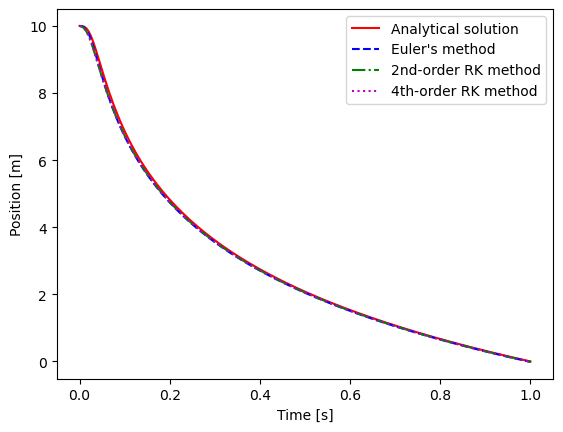

In [3]:
def rk4Method(f, x0, tf, N):

    tValues = np.linspace(0, tf, N)
    h = (tValues[-1] - tValues[0])/N

    xValues = [x0]  

    x = x0
    for t in tValues[1:]:   #we already know x(t[0]) = x0
        ##########################################################
        #This is where the method differes from Euler's method
        k1 = h*f(x,t)
        k2 = h*f(x+k1/2,t+(h/2))
        k3 = h*f(x+k2/2,t+(h/2))
        k4 = h*f(x+k3,t+h)
    
        x = x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        ##########################################################
        
        xValues.append(x)
        
    return tValues, xValues
####################################################################

tValues, euler = eulerMethod(f, x0, tf, N)
tValues, rk2 = rk2Method(f, x0, tf, N)
tValues, rk4 = rk4Method(f, x0, tf, N)

plt.figure()

plt.plot(tValues, -np.log(tValues**3 + math.exp(-x0)), "r" , label="Analytical solution")
plt.plot(tValues, euler, "b--" , label="Euler's method")
plt.plot(tValues, rk2,   "g-.", label="2nd-order RK method")
plt.plot(tValues, rk4,   "m:" , label="4th-order RK method")

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")

plt.legend(loc='best')

### Exercise

Use Euler's method to solve the differential equation describing the motion of an object subject to a linear drag force $F=-bv(t)$, where $b$ is a positive constant.  In this case, Newton's second law gives
\begin{align}
    F &= ma\\
    -bv(t) &= m\frac{\d v}{\d t},
\end{align}
or
\begin{equation}\tag{3}
    \frac{\d v}{\d t} = -\frac{b}{m}v(t).
\end{equation}
This represents a differential equation where the dependent variable is not position, but instead velocity, in which case Equations 1 and 2 become $\frac{\d v}{\d t}=f(v,t)$ and $v(t_0+h) = v(t_0) + hf(v(t_0),t_0)$, respectively.  Therefore, we can identify $f(v,t) = -\frac{b}{m}v(t)$.

Your goal is to calculate the velocity of the object at all future times.  Assume that $b=0.1$ kg/s, $m=1$ kg, and the initial velocity of the object was $v(t_0=0) = 10$ m/s.  Compare your solution with the analytical solution $v(t) = v(t_0)e^{-b(t-t_0)/m}$.

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
v0 = 10 #m/s
b  = .1  #kg/s
m  = 1  #kg

tf = 100 #s 
N = 40 #number of steps to perform

#in this case, f does not explicitly depend on time
def fDrag(v,t):   
    return -b*v/m 

tValues, euler = eulerMethod(fDrag, v0, tf, N)

plt.figure()

plt.plot(tValues, v0*np.exp(-b*tValues/m), "r" , label="Analytical solution")
plt.plot(tValues, euler, "b--" , label="Euler's method")

plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.legend(loc='best')
```
    
</details>

NB: in some situations, Euler's method can become unstable. Let's try again, but with $b=1$ kg/s.

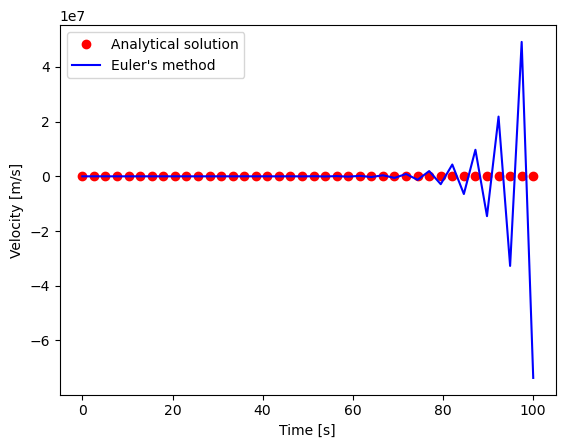

In [5]:
b  = 1  #kg/s

tValues, euler = eulerMethod(fDrag, v0, tf, N)

plt.figure()

plt.plot(tValues, v0*np.exp(-b*tValues/m), "ro" , label="Analytical solution")
plt.plot(tValues, euler, "b" , label="Euler's method")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.legend(loc='best')

This time, the absolute value of the velocity increases as a function of time, which clearly can't be the correct behavior in the presence of an opposing drag force.

### Solutions over an infinite range

Sometimes we wish to extrapolate our solution all the way to $t=\infty$.  This can be accomplished (without performing an infinite number of iterations) by performing a change of variables.

Just as we did when performing integration over an infinite range, let's define $u=\frac{t}{1+t}$.  After inversion, this becomes $t=\frac{u}{1-u}$, which approaches 1 as $u\rightarrow\infty$.  

We can use the chain rule to rewrite our differential equation as
\begin{equation}
    \frac{\d x}{\d u}\frac{\d u}{\d t} = f\left(x,t\right),
\end{equation}
or 
\begin{equation}\tag{6}
    \frac{\d x}{\d u} = \frac{\d t}{\d u}f\left(x,\frac{u}{1-u}\right).
\end{equation}

The derivative $\frac{\d t}{\d u}$ is easily calculable as $\frac{1}{\left(1-u\right)^2}$.  Plugging this into Equation 6, we obtain 
\begin{equation}
    \frac{\d x}{\d u} = \frac{1}{\left(1-u\right)^2}f\left(x,\frac{u}{1-u}\right).
\end{equation}
In terms of a new function $g(x,u)=\frac{1}{\left(1-u\right)^2}f\left(x,\frac{u}{1-u}\right)$, this becomes
\begin{equation}\tag{7}
    \frac{\d x}{\d u} = g(x,u).
\end{equation}
This is a standard first-order differential equation, which we can solve using the Euler or RK methods.  The key is that we only need to solve this equation up to $u=1$, which corresponds to $t=\infty$.  The resulting solution is the function $x(u)$, which we can remap to $x(t)$ using $t=\frac{u}{1-u}$.

--------

Let's use this method to solve the differential equation $\frac{\d x}{\d t} = \frac{1}{x^2+t^2}$, assuming $x(t_0)=1$ m.  In this case, we have
\begin{align}
    g(x,u) &= \frac{1}{\left(1-u\right)^2} f(x,\frac{u}{1-u})\\
           &= \frac{1}{\left(1-u\right)^2} \frac{1}{x^2+\left(\frac{u}{1-u}\right)^2}\\
    g(x,u) &= \frac{1}{\left(1-u\right)^2x^2+u^2},
\end{align}
and we must solve the differential equation $\frac{\d x}{\d u} = g(x,u)$ for $u$ from zero to one, with $x(u_0)=1$ m.

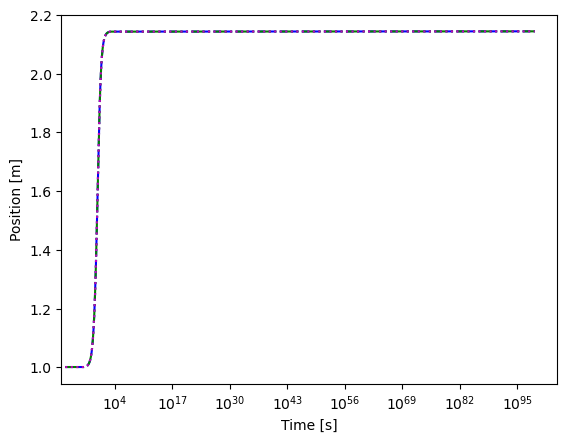

In [6]:
uf = 1
N = 1000
x0 = 1

def g(x,u):
    return 1/(((1-u)**2)*(x**2) + u**2)
    
uValues, euler = eulerMethod(g, x0, uf, N)
uValues, rk2 = rk2Method(g, x0, uf, N)
uValues, rk4 = rk4Method(g, x0, uf, N)

#function to map values of u to values of t
def u2t(u):
    result=[]
    
    for v in u:
        #make sure not to divide by zero (when u=1)
        if math.isclose(v,1): result.append(1e99)
        else:                 result.append(v/(1-v))
    
    return result

tValues = u2t(uValues)

#########################################################################################
plt.figure()

plt.plot(tValues, euler, "b--" , label="Euler's method")
plt.plot(tValues, rk2,   "g-.",  label="2nd-order RK method")
plt.plot(tValues, rk4,   "m:" ,  label="4th-order RK method")

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")

plt.xscale('log')